In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 통계적 가설검정이란
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법

- 검정통계량 vs 임곗값
- p값 vs 유의수준

통계적 가설 검정은, 모집단의 특성에 대한 가설을 세우고, 이 가설이 옳은지 여부를 검정하는 과정입니다. 이 과정에서는 표본 데이터를 이용하여 모집단의 특성을 추정하고, 추정한 결과를 바탕으로 가설을 세우고 검정합니다.

- 가설 검정에서는 대개 두 개의 가설을 세웁니다. 이 중에서 귀무가설(null hypothesis)은 일반적으로 채택되어져 있는 가설로, 이를 기각하기 위해서는 통계적으로 유의한 증거가 필요합니다. 대립가설(alternative hypothesis)은 귀무가설과 반대되는 가설로, 이 가설이 옳은지 검정하는 것이 목적입니다.

- 가설 검정에서는 먼저, 검정통계량(test statistic)을 계산합니다. 검정통계량은 표본 데이터를 이용하여 계산되는 통계량으로, 이를 통해 귀무가설이 맞는지 여부를 판단합니다. 검정통계량의 값이 특정 기준값보다 작으면, 귀무가설을 기각할 수 있습니다. 이 기준값은 보통 유의수준(significance level)이라고 불리며, 보통 0.05나 0.01로 설정됩니다. 이러한 유의수준은 귀무가설을 잘못 기각할 확률을 의미합니다.

- 가설 검정에서는 또한, 검정통계량의 분포를 이용하여 p값(p-value)을 계산합니다. p값은 귀무가설이 옳은데도 불구하고, 검정통계량이 현재 값 이상이 나올 확률을 의미합니다. 만약 p값이 유의수준보다 작으면, 귀무가설을 기각할 수 있습니다. 반대로, p값이 유의수준보다 크다면, 귀무가설을 기각할 수 없습니다.

- 가설 검정은 통계학에서 매우 중요한 개념 중 하나로, 데이터 분석의 근간을 이루는 기술 중 하나입니다. 특히, 가설 검정은 과학적인 사실을 검증하고, 의사결정을 하기 위해 필요한 중요한 도구입니다.

### z-검정 vs t-검정
- z-검정은 모집단의 분산이 알려져 있을 때 사용할 수 있는 검정 방법입니다. 예를 들어, 어떤 특성에 대한 모집단 분포가 정규분포를 따른다는 가정하에, 표본의 평균을 이용하여 모집단 평균을 추론하는 경우에 사용됩니다. 이때 표본 크기가 충분히 크다면, 중심극한정리에 따라 표본평균이 정규분포를 따르기 때문에 z-검정을 사용할 수 있습니다. z-검정은 검정통계량으로 z-score(표준정규분포 상에서의 위치)를 사용하며, z-score가 임계치보다 큰지 여부로 가설검정을 수행합니다.

- t-검정은 모집단의 분산이 알려져 있지 않을 때 사용할 수 있는 검정 방법입니다. 예를 들어, 표본의 크기가 작거나 모집단이 정규분포를 따르지 않는 경우 t-검정을 사용할 수 있습니다. t-검정은 검정통계량으로 t-score(표준정규분포 대신 t-분포 상에서의 위치)를 사용하며, t-score가 임계치보다 큰지 여부로 가설검정을 수행합니다. t-검정에서 사용되는 임계치는 자유도(degree of freedom)와 유의수준에 따라 달라집니다.

- 따라서, z-검정은 모집단 분산이 알려져 있을 때, t-검정은 모집단 분산이 알려져 있지 않을 때 사용됩니다. 또한, t-검정은 표본 크기가 크면 z-검정과 유사한 결과를 보여줄 수 있습니다.
    - z_score = (sample_mean - mu) / (sigma / np.sqrt(sample_size))
    - t_score = (sample_mean - mu) / (sample_std / np.sqrt(sample_size))

In [2]:
# sf 함수는 "Survival Function"의 약어로, 확률 분포 함수 중 하나입니다. 
# 이 함수는 특정 값보다 큰 값을 가지는 확률
import scipy.stats as stats

x = -1.6448536269514722
p = stats.norm.sf(x)
print(p)

0.95


In [3]:
# 양측 검정 : 상한값
stats.norm.isf(0.975)

-1.959963984540054

In [4]:
# 하한값
stats.norm.isf(1-0.975)

1.959963984540054

In [5]:
# isf : sf의 역함수
th1 = stats.norm.isf(1-0.05/2)
print(th1)
th2 = stats.norm.isf(0.05/2)
th2

-1.959963984540054


1.9599639845400545

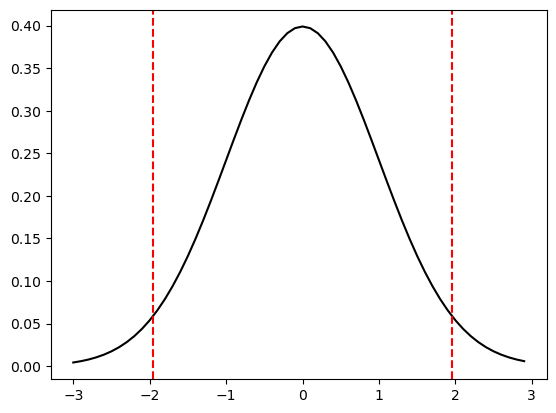

In [6]:
x_plot = np.arange(-3,3,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=0,scale=1),color='black')
plt.axvline(th1, color='red', linestyle='--', label='임계값')
plt.axvline(th2, color='red', linestyle='--', label='임계값')
plt.show()

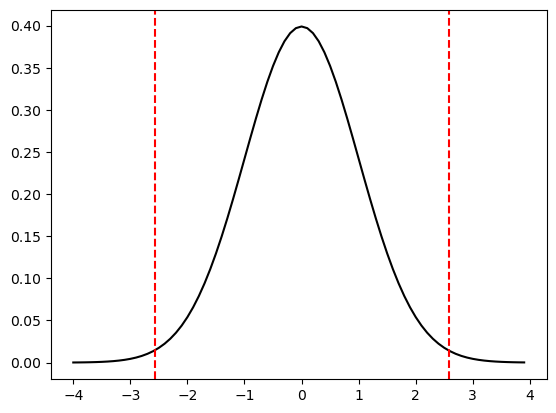

-2.5758293035489004
2.575829303548901


In [7]:
t1 = stats.norm.isf(1-0.01/2)
t2 = stats.norm.isf(0.01/2)

x_plot = np.arange(-4,4,0.1)
plt.plot(x_plot,stats.norm.pdf(x=x_plot,loc=0,scale=1),color='black')
plt.axvline(t1, color='red', linestyle='--', label='임계값')
plt.axvline(t2, color='red', linestyle='--', label='임계값')
plt.show()

print(t1)
print(t2)

## t 검정 임계값
t 검정에서는 검정통계량(t-score)을 사용하여 가설검정을 수행합니다. 이때, 검정통계량은 t-분포를 따르므로, 유의수준(alpha)과 검정 방향(양측검정 또는 단측검정)에 따라 t-분포의 분위수를 사용하여 임계값을 결정

In [8]:
from scipy.stats import norm

# 모집단의 평균과 표준편차를 지정합니다.
mu = 100
sigma = 10

# 표본 데이터를 생성합니다.
sample_size = 100
sample = np.random.normal(mu, sigma, sample_size)

# 표본 평균과 표준편차를 계산합니다.
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 검정통계량과 유의확률을 계산합니다.
z = (sample_mean - mu) / (sigma / np.sqrt(sample_size))
p_value = 1 - norm.cdf(z)

print('검정통계량:', z)
print('유의확률:', p_value)

#검정통계량 z 값과 유의수준(α)에 따라서 임계값을 계산할 수 있습니다. 보통 α=0.05로 설정하여 유의수준이 5%일 때, 양측검정을 할 경우 임계값은 ±1.96이 됩니다.

#만약 단측검정을 수행한다면, 유의수준(α)과 검정 방향에 따라서 임계값이 달라집니다. 예를 들어, 유의수준이 5%이고, 검정 방향이 오른쪽(대립가설: 평균 > 기준값)인 경우에는 임계값이 1.645가 됩니다.

#따라서, 해당 코드에서는 양측검정을 수행하므로, 임계값은 ±1.96이 됩니다. 이를 코드로 나타내면 다음과 같습니다.

#python
#Copy code
#alpha = 0.05
#critical_value = norm.ppf(1-alpha/2)
#lower_bound = -critical_value
#upper_bound = critical_value

#print(f"임계값: ({lower_bound}, {upper_bound})")
#위 코드를 실행하면 다음과 같은 결과가 나타납니다.


# 임계값: (-1.959963984540054, 1.959963984540054) 범위내 z score가 있으므로 귀무가설을 기각할 수 없음
# p값이 0.05 보다 크므로 귀무가설을 기각할 수 없음

검정통계량: 1.557348386254091
유의확률: 0.05969389662966429


In [9]:
from scipy.stats import t

# 모집단의 평균을 지정합니다.
mu = 100

# 표본 데이터를 생성합니다.
sample_size = 20
sample = np.random.normal(mu, 10, sample_size)

# 표본 평균과 표준편차를 계산합니다.
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 검정통계량과 유의확률을 계산합니다.
t_score = (sample_mean - mu) / (sample_std / np.sqrt(sample_size))
p_value = 2 * (1 - t.cdf(abs(t_score), df=sample_size-1))

print('검정통계량:', t_score)
print('유의확률:', p_value)

검정통계량: 1.2278068523151082
유의확률: 0.23451387710497373


In [10]:
# 양측검정
import numpy as np
from scipy.stats import t

alpha = 0.05  # 유의수준
df = 19  # 자유도
t_crit1 = t.ppf(alpha/2, df)  # 양측검정의 임계값
t_crit2 = t.ppf(1-alpha/2, df)
print('임계값:', t_crit1,t_crit2)

임계값: -2.0930240544082634 2.093024054408263


In [11]:
# 우측단측검정
alpha = 0.05  # 유의수준
df = 19  # 자유도
t_crit = t.ppf(1-alpha, df)  # 우측단측
t_crit

1.729132811521367

## p-value를 계산하고 검정을 수행하는 방법
t.cdf() 함수를 이용하여 t-분포의 누적분포함수(cumulative distribution function) 값을 계산합니다. 그리고 p-value는 양측검정이므로, 계산된 누적분포함수 값에서 양쪽 꼬리 면적을 고려하여 2를 곱합니다.

계산된 p-value는 유의수준(alpha)와 비교하여 검정을 수행합니다. 만약 p-value가 alpha보다 작으면, 귀무가설을 기각하고 대립가설을 채택합니다. 그 반대로, p-value가 alpha보다 크면, 귀무가설을 채택

In [12]:
# 모집단 평균과 표준편차를 지정합니다.
mu = 100
sigma = 10

# 표본 데이터를 생성합니다.
sample_size = 20
sample = np.random.normal(mu, sigma, sample_size)

# 표본 평균과 표준오차를 계산합니다.
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
standard_error = sample_std / np.sqrt(sample_size)

# 검정통계량을 계산합니다.
t_score = (sample_mean - mu) / standard_error

# 유의수준과 검정 방향을 설정합니다.
alpha = 0.05  # 95% 신뢰수준
tail = 'two'  # 양측검정

# 임계값을 계산합니다.
if tail == 'two':
    t_crit = t.ppf(1 - alpha/2, df=sample_size-1)
else:
    t_crit = t.ppf(1 - alpha, df=sample_size-1)

# 검정결과를 출력합니다.
if abs(t_score) > t_crit:
    print('귀무가설 기각: 표본평균과 모집단평균은 유의하게 다릅니다.')
else:
    print('귀무가설 채택: 표본평균과 모집단평균은 차이가 없습니다.')

귀무가설 채택: 표본평균과 모집단평균은 차이가 없습니다.


In [13]:
# p_value를 구해서 검정을 수행
# 모집단 평균과 표준편차를 지정합니다.
mu = 100
sigma = 10

# 표본 데이터를 생성합니다.
sample_size = 20
sample = np.random.normal(mu, sigma, sample_size)

# 표본 평균과 표준오차를 계산합니다.
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
standard_error = sample_std / np.sqrt(sample_size)

# 검정통계량과 p-value를 계산합니다.
t_score = (sample_mean - mu) / standard_error
p_value = 2 * (1 - t.cdf(abs(t_score), df=sample_size-1))

# 유의수준을 설정합니다.
alpha = 0.05

# 검정결과를 출력합니다.
if p_value < alpha:
    print('귀무가설 기각: p-value는', round(p_value,2), '이며, 표본평균과 모집단평균은 유의하게 다릅니다.')
else:
    print('귀무가설 채택: p-value는', round(p_value,2), '이며, 표본평균과 모집단평균은 차이가 없습니다.')

귀무가설 채택: p-value는 0.83 이며, 표본평균과 모집단평균은 차이가 없습니다.


- 귀무가설 대립가설
    - 기각 대상이 되는 첫번째 가설을 귀무가설, 귀무가설과 대립되는 가설을 대립가설이라고 함
    - 귀무가설이 기각된다면 즉 귀무가설이 틀렸다고 판단을 하면 유의미한 차이가 있다는 것임
- p값(유의확률) : 표본과 귀무가설 간의 모순을 나타내는 지표
    - p값이 작을수록 귀무가설과 표본이 모순된다고 판단
- 유의수준 : 귀무가설을 기각하는 기준이 되는 값
    - 유의수준은 위험률이라고 하며 5%를 사용하는 경우가 많음

일표본 t-검정

일표본 t-검정은 하나의 표본에 대해 평균이 특정 값과 다른지 검정하는 방법입니다. 가설검정의 절차는 다음과 같습니다.

- 귀무가설과 대립가설 설정
- 유의 수준 결정
- 검정통계량(t-값) 계산
- 임계값과 비교
- 검정결과 판단 및 결론 도출

일표본 t-검정

일표본 t-검정은 하나의 표본에 대해 평균이 특정 값과 다른지 검정하는 방법입니다. 가설검정의 절차는 다음과 같습니다.

- 귀무가설과 대립가설 설정
- 유의 수준 결정
- 검정통계량(t-값) 계산
- 임계값과 비교
- 검정결과 판단 및 결론 도출

In [14]:
#일표본 t-검정

# 샘플 데이터 생성
sample_data = np.array([10.8, 9.5, 11.2, 10.5, 11.3, 10.7, 10.9, 9.8, 11.0, 10.4])

# 귀무가설: 표본 평균은 10과 같다
# 대립가설: 표본 평균은 10이 아니다
mu = 10  # 귀무가설에 따른 평균값
alpha = 0.05  # 유의 수준
sample_mean = np.mean(sample_data)  # 표본평균
sample_std = np.std(sample_data, ddof=1)  # 표본표준편차
df = len(sample_data) - 1  # 자유도
t_value = (sample_mean - mu) / (sample_std / np.sqrt(len(sample_data)))  # 검정통계량
t_crit1 = t.ppf(alpha/2, df) # 임계값
t_crit2 = t.ppf(1-alpha/2, df) 
p_value = t.sf(abs(t_value), df) * 2  # p-value

# 결과 출력
print('표본평균:', sample_mean)
print('표본표준편차:', sample_std)
print('t-값:', t_value)
print('임계값:', t_crit1, t_crit2)
print('p-value:', p_value)

if abs(t_value) > t_crit2:
    print('유의수준 {}에서 검정통계량은 임계값보다 크므로 귀무가설 기각'.format(alpha))
else:
    print('유의수준 {}에서 검정통계량은 임계값보다 작으므로 귀무가설 채택'.format(alpha))

표본평균: 10.610000000000001
표본표준편차: 0.5820461990063828
t-값: 3.3141516532462774
임계값: -2.262157162740992 2.2621571627409915
p-value: 0.009024007157468749
유의수준 0.05에서 검정통계량은 임계값보다 크므로 귀무가설 기각


In [15]:
#한글 폰트 설정
from matplotlib import rc

rc('font',family='Malgun Gothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정

#### 과제1_0418
t분포 확률밀도 함수를 그래프로 그리고 그 뒤에 t_value와 임계값을 vline으로 표시하세요.

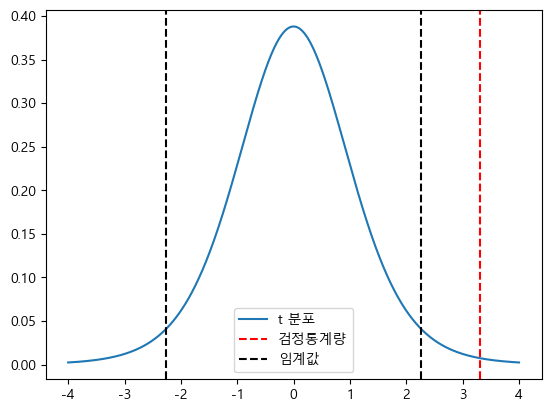

In [16]:
mu = 10  # 귀무가설에 따른 평균값
alpha = 0.05  # 유의 수준
sample_mean = np.mean(sample_data)  # 표본평균
sample_std = np.std(sample_data, ddof=1)  # 표본표준편차
df = len(sample_data) - 1  # 자유도
t_value = (sample_mean - mu) / (sample_std / np.sqrt(len(sample_data)))  # 검정통계량
t_crit1 = t.ppf(alpha/2, df) # 임계값
t_crit2 = t.ppf(1-alpha/2, df) 
p_value = t.sf(abs(t_value), df) * 2  # p-value

x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)


fig, ax = plt.subplots()
ax.plot(x, y, label='t 분포')
ax.axvline(x=t_value, color='r', linestyle='--', label='검정통계량')
ax.axvline(x=t_crit1, color='k', linestyle='--', label='임계값')
ax.axvline(x=t_crit2, color='k', linestyle='--')
ax.legend()


#### 대응표본 t-검정(Paired samples t-test) 
동일한 개체나 집단에서, 두 조건의 차이에 대한 검정 방법입니다. 
예를 들어, 특정 약의 효과를 검증하기 위해, 약을 복용하기 전과 후의 체온을 측정한 경우에 대응표본 t-검정을 사용할 수 있습니다.

In [17]:
pt_data = pd.read_csv("data/5_9_ptt.csv")
pt_data

,person,medicine,body_temperature
0,A,before,36.2
1,B,before,36.2
2,C,before,35.3
3,D,before,36.1
4,E,before,36.1
5,A,after,36.8
6,B,after,36.1
7,C,after,36.8
8,D,after,37.1
9,E,after,36.9


In [18]:
pt_data.medicine.value_counts()

before    5
after     5
Name: medicine, dtype: int64

In [19]:
before = pt_data[pt_data.medicine == "before"]["body_temperature"]
after = pt_data[pt_data.medicine == "after"]["body_temperature"]

before = np.array(before)
after = np.array(after)
diff = after - before
diff

array([ 0.6, -0.1,  1.5,  1. ,  0.8])

In [20]:
from scipy import stats
# 평균값이 0과 다른지 검정
# 귀무가설을 기각하므로 통계적으로 유의미한 차이가 있다고 주장할 수 있다.
stats.ttest_1samp(diff,0)

Ttest_1sampResult(statistic=2.901693483620596, pvalue=0.044043109730074276)

#### 독립표본 t-검정(Independent samples t-test)
두 개의 독립된 집단에서, 각 집단의 평균 차이가 유의한지를 검정하는 방법입니다. 예를 들어, 남자와 여자의 평균 키를 비교하는 경우에 독립표본 t-검정을 사용할 수 있습니다.

In [21]:
# 평균
mean_bf = np.mean(before)
mean_af = np.mean(after)
# 분산
sigma_bf = np.var(before, ddof = 1)
sigma_af = np.var(after, ddof = 1)
# 샘플사이즈
m = len(before)
n = len(after)

# t 값
t_value = (mean_af - mean_bf) / np.sqrt((sigma_bf/m+sigma_af/n))
t_value

3.1557282344421034

In [22]:
# equal_var = False : 분산이 다르다고 가정한 검정
stats.ttest_ind(after,before, equal_var = False)

Ttest_indResult(statistic=3.1557282344421034, pvalue=0.013484775682079892)

#### 과제2_0418
동일한 집단에 대해서 약 복용 전과 후의 체온의 변화가 있는지에 대한 유의성 검정을 수행하시오.
- 약 복용 전 체온 데이터 : [36.2, 36.1, 36.5, 36.3, 36.2, 36.4, 36.3, 36.1, 36.6, 36.2]
- 약 복용 후 체온 데이터 : [36.5, 36.3, 36.8, 36.6, 36.5, 36.7, 36.6, 36.2, 36.9, 36.4]

In [23]:
before =  np.array([36.2, 36.1, 36.5, 36.3, 36.2, 36.4, 36.3, 36.1, 36.6, 36.2])
after =  np.array([36.5, 36.3, 36.8, 36.6, 36.5, 36.7, 36.6, 36.2, 36.9, 36.4])
stats.ttest_ind(after,before, equal_var = False)

Ttest_indResult(statistic=3.00444774150815, pvalue=0.008037856208219164)

In [24]:
# A
from scipy.stats import ttest_rel
t_statistic, p_value = ttest_rel(before, after)
alpha = 0.05

if p_value < alpha:
    print("약의 효과가 있다.")
else:
    print("약의 효과가 없다.")

약의 효과가 있다.


In [25]:
ttest_rel(before, after)

Ttest_relResult(statistic=-11.758942438532666, pvalue=9.15111121564323e-07)

#### 과제3_0418.
남자와 여자 두 그룹에 대해서 평균 키의 차이가 있는지에 대한 유의성 검정을 수행하세요.
- 남자의 키 데이터 : [172, 174, 176, 178, 180, 182, 184, 186, 188, 190]
- 여자의 키 데이터 : [156, 158, 160, 162, 164, 166, 168, 170, 172, 174]

In [26]:
male_heights = np.array([172, 174, 176, 178, 180, 182, 184, 186, 188, 190])
female_heights =np.array([156, 158, 160, 162, 164, 166, 168, 170, 172, 174])
stats.ttest_ind(male_heights, female_heights, equal_var=False)

Ttest_indResult(statistic=5.90839156700797, pvalue=1.3603112478171794e-05)

In [27]:
# A
t_statistic, p_value = stats.ttest_ind(male_heights, female_heights)
alpha = 0.05

if p_value < alpha:
    print("평균 차이가 있다.")
else:
    print("평균 차이가 없다.")

평균 차이가 있다.


#### 카이제곱 분포
- 분산분석이나 독립성 검정 등에서 사용되는 확률분포입니다. 카이제곱 분포는 자유도(degree of freedom)에 따라 모양이 달라지며, 자유도가 클수록 정규분포에 가까워집니다.

- 독립성 검정에서 카이스퀘어 분포를 사용하는 이유는 검정통계량으로서 카이스퀘어 검정통계량을 사용하기 때문입니다.

- 독립성 검정은 두 범주형 변수 간의 관련성을 검정하는 방법입니다. 예를 들어, 성별과 흡연 여부라는 두 가지 범주형 변수가 있을 때, 이 두 변수 간에는 관련성이 있는지 없는지를 검정하는 것입니다.

- 카이스퀘어 검정통계량은 범주형 변수 간의 관련성을 검정하는 데 사용되며, 관측된 빈도와 기대 빈도 간의 차이를 이용하여 검정통계량을 계산합니다. 검정통계량은 카이스퀘어 분포를 따르므로, 카이스퀘어 분포를 이용하여 유의확률을 계산합니다. 이 때, 검정통계량이 카이스퀘어 분포를 따르는 것은 큰 표본에서는 중심극한정리에 의해, 작은 표본에서는 피셔의 정확 검정에 의해 유도됩니다.

- 따라서, 독립성 검정에서 카이스퀘어 분포를 사용하는 이유는, 검정통계량으로서 카이스퀘어 검정통계량을 사용하기 때문입니다. 이를 통해, 범주형 변수 간의 관련성을 검정할 때 적절한 검정통계량을 사용할 수 있으며, 이를 기반으로 유의확률을 계산하여 검정 결과를 도출할 수 있습니다.

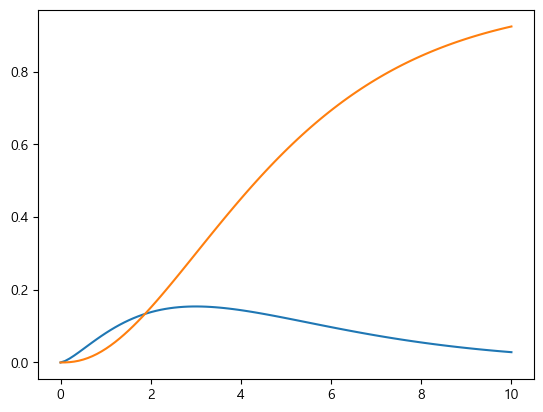

In [28]:
from scipy.stats import chi2

# 카이제곱 분포의 확률밀도함수 그래프
x = np.linspace(0,10,100)
df = 5
pdf = chi2.pdf(x,df)
plt.plot(x,pdf, label = "PDF")

# 카이제곱 분포의 누적분포함수 그래프
x = np.linspace(0,10,100)
df = 5
cdf = chi2.cdf(x,df)
plt.plot(x,cdf, label = "CDF")

#### 독립성 검정
- 독립성 검정은 두 개의 범주형 변수 간의 상관 관계를 검정하는 방법입니다. 독립성 검정에서는 귀무가설로 두 변수가 서로 독립적이라는 가정을 놓고, 대립가설로 두 변수가 서로 상관 관계가 있다는 가정을 놓습니다. 검정 결과로는 유의확률이 출력되며, 유의확률이 유의수준보다 작을 경우 귀무가설을 기각하고 대립가설을 채택합니다.

- 독립성 검정에서는 검정통계량으로 카이제곱 검정통계량을 사용합니다. 검정통계량을 계산하기 위해 교차표(cross table)을 생성하고, 이를 바탕으로 관측값과 기대값의 차이를 계산합니다. 교차표는 각 범주형 변수의 카테고리를 축으로 하는 표입니다. 예를 들어, 성별과 흡연 여부라는 두 범주형 변수 간의 독립성을 검정하는 경우, 교차표는 성별을 행으로, 흡연 여부를 열로 나열한 표입니다.

- 검정 결과로는 검정통계량과 유의확률이 출력되며, 유의확률이 유의수준보다 작으면 귀무가설을 기각하고 대립가설을 채택합니다. 따라서, 독립성 검정 결과를 해석할 때에는 유의수준을 고려하여 검정 결과를 해석해야 합니다.

In [29]:
from scipy.stats import chi2_contingency

# 교차표 생성
observed = [[10,20],[30,40]]

# 카이 제곱 검정 실행
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

print(f"카이 제곱 검정 통계량 : {chi2_stat}\np_value : {p_value}\n자유도 : {dof}\n기대빈도 : {expected}")

카이 제곱 검정 통계량 : 0.4464285714285714
p_value : 1.3603112478171794e-05
자유도 : 1
기대빈도 : [[12. 18.]
 [28. 42.]]


In [30]:
click_data = pd.read_csv("data/5_10_cd.csv")
click_data

,color,click,freq
0,blue,click,20
1,blue,not,230
2,red,click,10
3,red,not,40


In [31]:
# 분할표
cross = pd.pivot_table(data = click_data, values = "freq", aggfunc = "sum", index = "color", columns = "click")
cross

click,click,not
color,,
blue,20,230
red,10,40


In [32]:
# p값이 0.05보다 작으므로 색에 따라 버튼을 클릭하는 것이 유의미하게 변한다고 판단
# 통계량, p값, 자유도, 기대도수표
stats.chi2_contingency(cross, correction = False) #보정 안함

(6.666666666666666,
 0.009823274507519247,
 1,
 array([[ 25., 225.],
        [  5.,  45.]]))

#### 과제4_0418
아래 df에서 gender와 purchase간 독립성 검정을 수행하고 그 결과를 해석하시오.

In [33]:
# 귀무가설로 두 변수가 서로 독립적이라는 가정
# 데이터 프레임 생성
data = {'gender': ['M', 'M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'M'],
        'purchase': ['yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes']}
df = pd.DataFrame(data)
df

,gender,purchase
0,M,yes
1,M,yes
2,F,no
3,F,yes
4,F,no
5,M,yes
6,M,no
7,F,no
8,M,no
9,M,yes


In [37]:
stats.chi2_contingency(pd.crosstab(df['gender'], df['purchase']))

(0.41666666666666663,
 0.5186050164287255,
 1,
 array([[2., 2.],
        [3., 3.]]))

In [39]:
# A
chi2_stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['gender'], df['purchase']))

print(f"카이 제곱 검정 통계량 : {chi2_stat}\np_value : {p_value}\n자유도 : {dof}\n 기대 빈도 : {expected}")

카이 제곱 검정 통계량 : 0.41666666666666663
p_value : 0.5186050164287255
자유도 : 1
 기대 빈도 : [[2. 2.]
 [3. 3.]]
